# Bitwise operations

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# With numpy create a black canvas of size 800 x 800 
blk = np.zeros((800,800), dtype="uint8")
blk.shape

(800, 800)

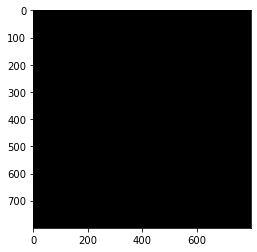

In [5]:
# Make a copy of the canvas and draw a white square of size 250 x 250 on top of the copy of the canvas
plt.imshow(blk, cmap='gray')

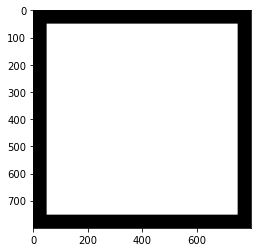

In [6]:
# Make a copy of the origina lcanvas and draw a white circle of size 200 x 200 on top of the copy of the canvas
# Make sure the circle is in a different position of the canvas than the square
square = blk.copy()
cv2.rectangle(square, (50,50),(750,750),255,-1)
plt.imshow(square, cmap='gray')

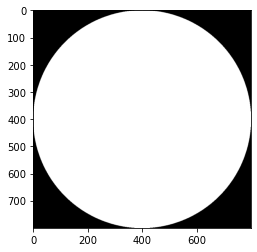

In [7]:
circle1 = blk.copy()
cv2.circle(circle1, (400,400),400,255,-1)
plt.imshow(circle1, cmap='gray')

In [8]:
# blk_negative = cv2.bitwise_not(square)
# plt.imshow(blk_negative, cmap='gray')

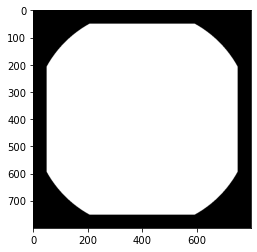

In [9]:
# Create a new image and merge both previous images (square and circle) with a bitwise and operation
blk_and = cv2.bitwise_and(square,circle1)
plt.imshow(blk_and, cmap='gray')

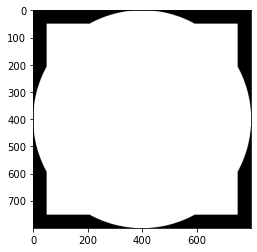

In [10]:
# Create a new image and merge both previous images (square and circle) with a bitwise or operation
blk_or = cv2.bitwise_or(square,circle1)
plt.imshow(blk_or, cmap='gray')

In [11]:
# Create a new image and merge both previous images (square and circle) with a bitwise not operation
# blk_not = cv2.bitwise_not(circle)
# plt.imshow(blk_not, cmap='gray')

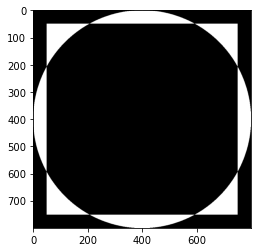

In [12]:
# Create a new image and merge both previous images (square and circle) with a bitwise xor operation
blk_xor = cv2.bitwise_xor(circle1,square)
plt.imshow(blk_xor, cmap='gray')

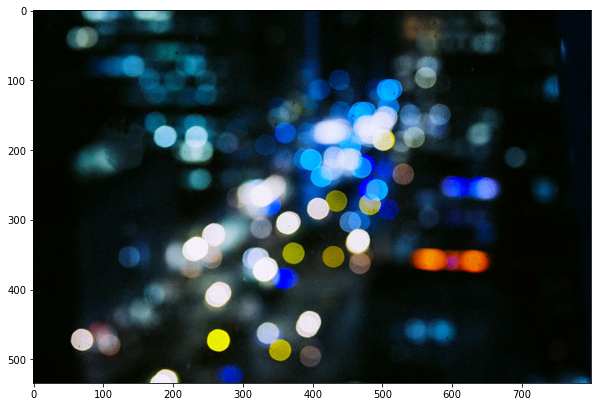

In [13]:
# Load a color image and convert it to HSV
# Identify a prominent color from the image and filter it out
# Create a mask for that color and apply a bitwise and specifying the mask to show only this part of the image

img = cv2.imread('img/bokeh.jpg')
img2 = cv2.imread('img/day1.jpg')

def imshow(img):
    plt.figure(figsize = (10,7));
    plt.imshow(img)
    # plt.imshow(img[:,:,::-1]);

hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
imshow(img)

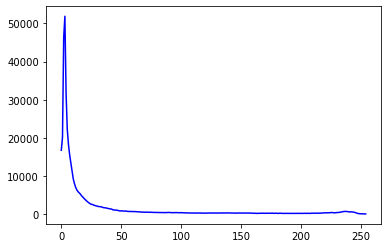

In [14]:
hist_blue = cv2.calcHist([img],[0],None,[255],[0,255])
plt.plot(hist_blue, color='b')

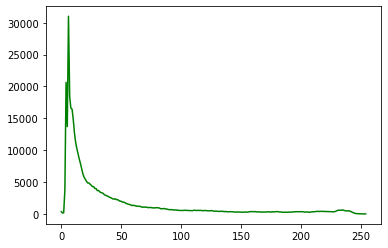

In [15]:
hist_green = cv2.calcHist([img],[1],None,[255],[0,255])
plt.plot(hist_green, color='g')

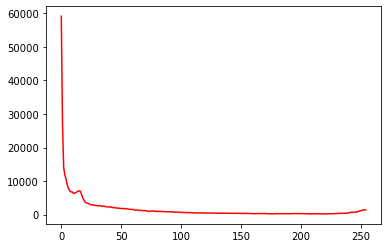

In [16]:
hist_red = cv2.calcHist([img],[2],None,[255],[0,255])
plt.plot(hist_red, color='r')

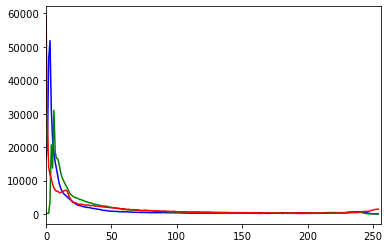

In [17]:
colors = ['b','g','r']
for i, color in enumerate(colors):
    histogram = cv2.calcHist([img],[i],None,[255],[0,255])
    plt.plot(histogram, color=color)
    plt.xlim(0,256)
plt.show()

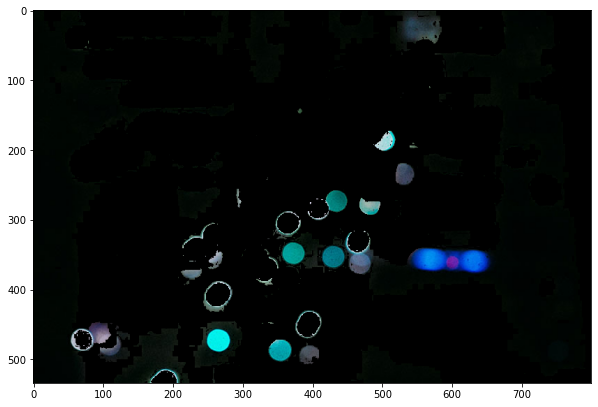

In [43]:
lower_range = (60,20,0)
upper_range = (150,255,255)

mask = cv2.inRange(hsv_img, lower_range, upper_range)
masked = rgb_img.copy()
masked[mask==0] = [0,0,0]
#plt.imshow(cv2.cvtColor(masked,cv2.COLOR_BGR2RGB))
imshow(masked)

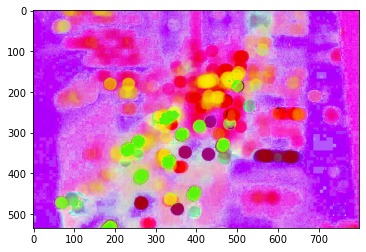

In [44]:
img_not = cv2.bitwise_not(hsv_img)
plt.imshow(img_not, cmap='gray')

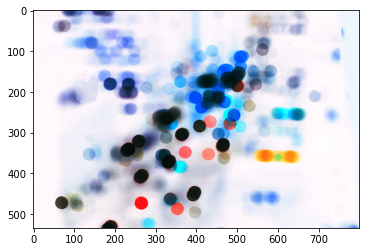

In [45]:
img_not1 = cv2.bitwise_not(rgb_img)
plt.imshow(img_not1, cmap='gray')

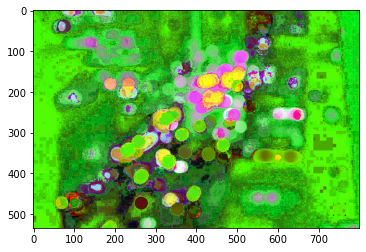

In [46]:
# With the same image and mask you have created above now apply a bitwise not specifying the mask 
# to show everything but the color you masked out before

img_xor = cv2.bitwise_xor(img_not,img_not1)
plt.imshow(img_xor, cmap='gray')


In [47]:
# blur kernel
blur_kernel = np.ones((8,8), np.float32)/64
blur_kernel

array([[0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625,
        0.015625, 0.015625],
       [0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625,
        0.015625, 0.015625],
       [0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625,
        0.015625, 0.015625],
       [0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625,
        0.015625, 0.015625],
       [0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625,
        0.015625, 0.015625],
       [0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625,
        0.015625, 0.015625],
       [0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625,
        0.015625, 0.015625],
       [0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625,
        0.015625, 0.015625]], dtype=float32)

In [48]:
blur_img = cv2.filter2D(rgb_img,-1, blur_kernel)


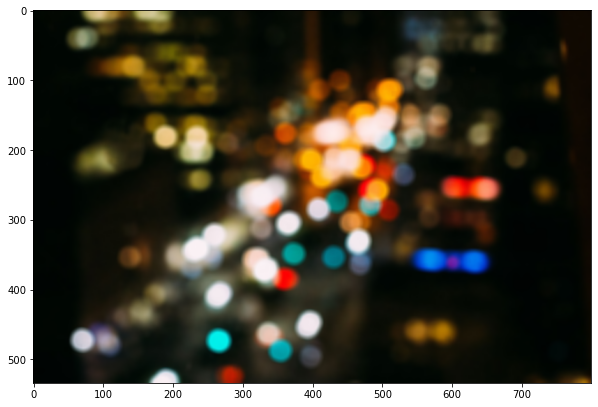

In [49]:
imshow(blur_img)

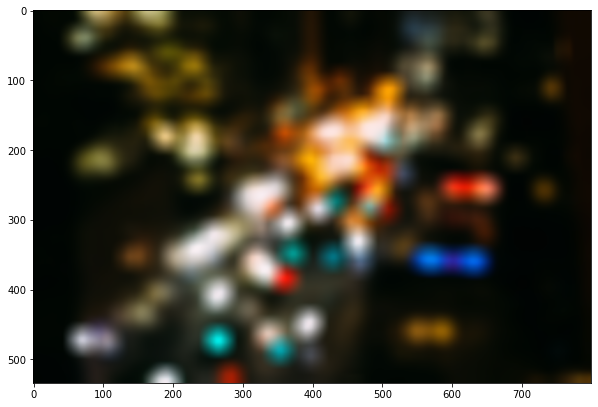

In [50]:
img_blur_2 = cv2.blur(rgb_img,(25,25))
imshow(img_blur_2)

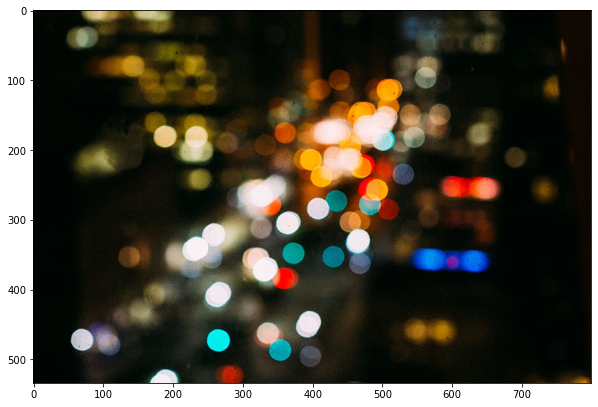

In [51]:
imshow(rgb_img)
